In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='double', rarity='usual', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='double', rarity='unusual', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='double', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='double', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='goldz', pk='day', limits=(20,30))


# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,usual,unusual,rare,epic
20,11.0,4.82,5.44,5.52,5.96,6.06
21,11.0,4.52,5.22,5.66,5.94,5.64
22,12.0,4.72,5.20,5.70,5.92,5.90
23,12.0,4.76,5.40,5.80,6.12,6.04
24,13.0,4.82,5.56,5.54,5.88,6.06
25,13.0,5.14,5.20,5.38,6.12,6.08
26,14.0,4.66,5.34,5.68,5.82,5.98
27,14.0,4.66,5.46,5.92,6.00,6.06
28,15.0,4.70,5.22,5.70,5.54,6.10
29,15.0,4.96,5.52,5.98,5.94,6.06


# TOTAL GOLDZ AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_sum

,no_hero,usual,unusual,rare,epic
0,47.76,53.56,56.88,59.24,59.98


Text(0.5, 1.0, 'Total Goldz After 5 Days')

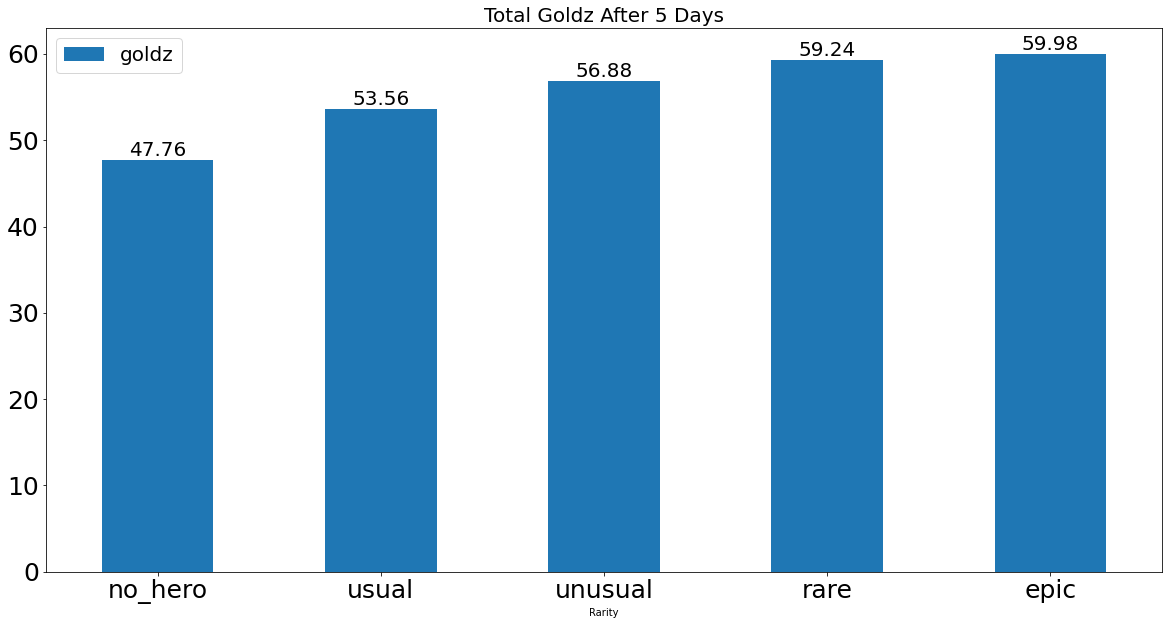

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Goldz After 5 Days", fontsize=20)

# GOLDZ AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','usual', 'unusual', 'rare', 'epic'])
df_mean

,no_hero,usual,unusual,rare,epic
0,4.776,5.356,5.688,5.924,5.998


Text(0.5, 1.0, 'Goldz Average on Each attack')

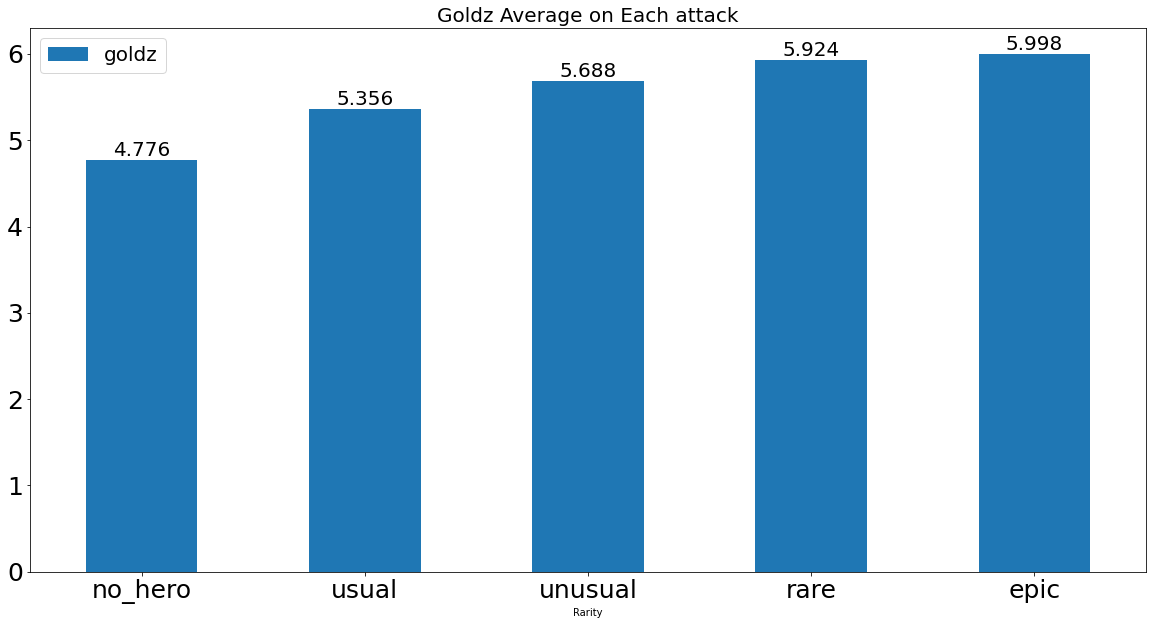

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'goldz':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Goldz Average on Each attack", fontsize=20)

# GOLDZ DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,usual,unusual,rare,epic
20,11.0,0.62,0.70,1.14,1.24
21,11.0,0.70,1.14,1.42,1.12
22,12.0,0.48,0.98,1.20,1.18
23,12.0,0.64,1.04,1.36,1.28
24,13.0,0.74,0.72,1.06,1.24
25,13.0,0.06,0.24,0.98,0.94
26,14.0,0.68,1.02,1.16,1.32
27,14.0,0.80,1.26,1.34,1.40
28,15.0,0.52,1.00,0.84,1.40
29,15.0,0.56,1.02,0.98,1.10


# TOTAL GOLDZ EARNED COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_sum

,usual,unusual,rare,epic
0,5.8,9.12,11.48,12.22


Text(0.5, 1.0, 'Total Diff Goldz Compared to No Hero')

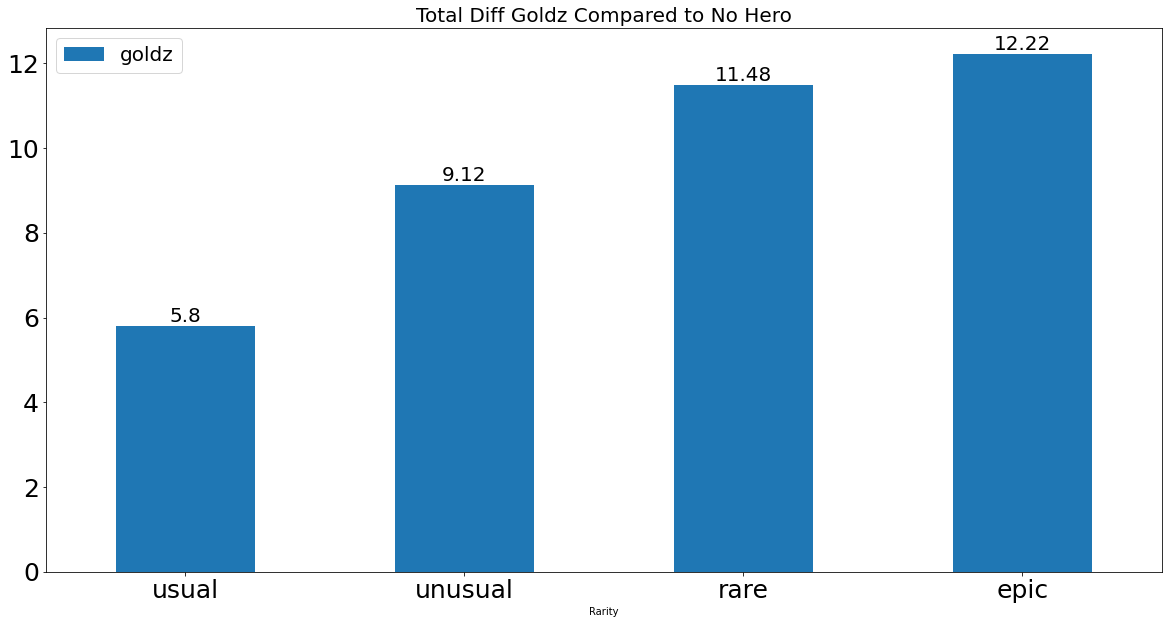

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'goldz':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Goldz Compared to No Hero", fontsize=20)

# GOLDZ DIFFERENCE EARNED PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['usual', 'unusual', 'rare', 'epic'])
df_diff_mean

,usual,unusual,rare,epic
0,0.58,0.912,1.148,1.222


Text(0.5, 1.0, 'Diff Goldz Average per Attack')

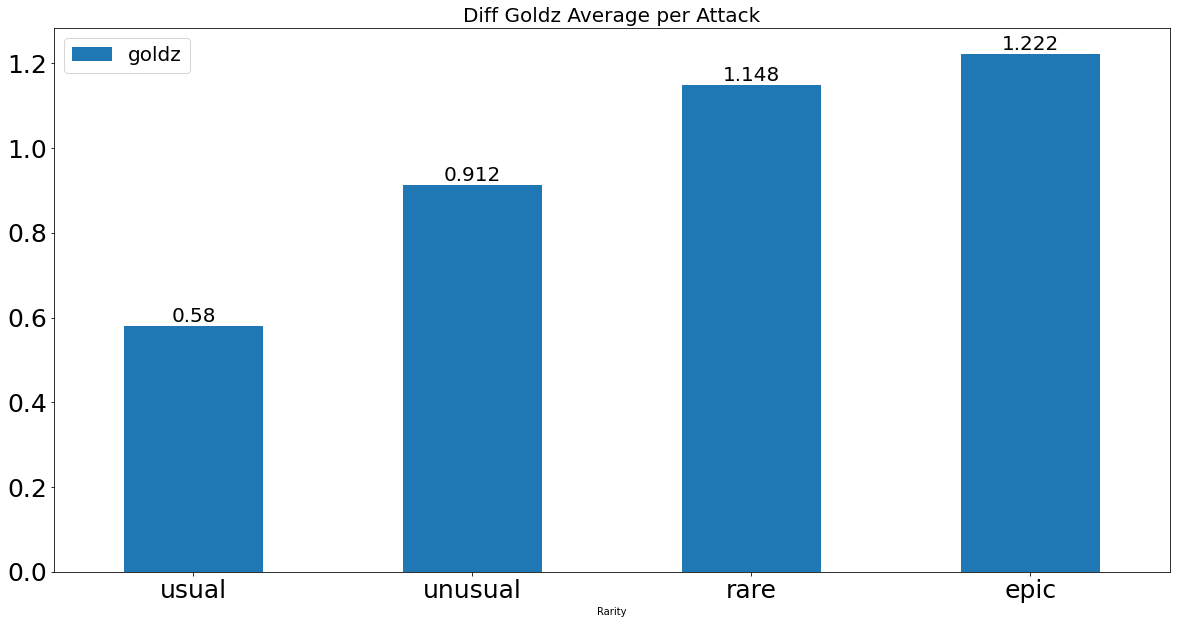

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'goldz':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Goldz Average per Attack", fontsize=20)